In [11]:
%pip install pytrends

Note: you may need to restart the kernel to use updated packages.


In [197]:
import pandas as pd                        
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import datetime
from datetime import date
import matplotlib.dates as mdates
from pandas.io.json import json_normalize

In [198]:
pytrend = TrendReq(hl='en-US', tz=360)

In [199]:
#Search name
keywords = ['aws','gcp','azure']

In [200]:
#Set lookback year from now on
user_timeframe = input ()

1


In [201]:
#Reset numyears
if user_timeframe == "5":
    numyears = 5
elif user_timeframe == "4":
    numyears = 4
elif user_timeframe == "3":
    numyears = 3
elif user_timeframe == "2":
    numyears = 2
else:
    numyears = 1

In [231]:
#Set lookback year from now on or set specific date at below block
numdays = 10
numweeks = 52
total_time_range = numdays * numweeks * numyears
end_date= date.today()
today_date = date.today()
end_date = today_date
begin_date = end_date - datetime.timedelta(days = total_time_range-10)
user_timeframe = begin_date.strftime('%Y-%m-%d')+' '+end_date.strftime('%Y-%m-%d')
print(user_timeframe)

2018-10-16 2020-03-09


In [232]:
#Search 
pytrend.build_payload(kw_list=keywords, cat=0, timeframe=user_timeframe, geo='TW', gprop='')

In [233]:
#Show the dataframe
pytrend.interest_over_time().head()

,aws,gcp,azure,isPartial
date,,,,
2018-10-21,80,26,38,False
2018-10-28,89,22,49,False
2018-11-04,70,20,33,False
2018-11-11,66,20,27,False
2018-11-18,70,18,45,False


In [173]:
interest_over_time_df = pytrend.interest_over_time()
print(interest_over_time_df.head())

            aws  gcp  azure isPartial
date                                 
2019-03-24   74   32     46     False
2019-03-31   55   22     31     False
2019-04-07   73   16     37     False
2019-04-14   73   33     43     False
2019-04-21   78   29     48     False


In [174]:
round(interest_over_time_df.describe(),2)

,aws,gcp,azure
count,50.00,50.00,50.00
mean,74.48,29.74,46.30
std,11.58,6.11,7.67
min,33.00,10.00,24.00
25%,72.00,28.00,42.00
50%,76.00,30.50,46.50
75%,82.00,33.00,49.00
max,100.00,43.00,69.00


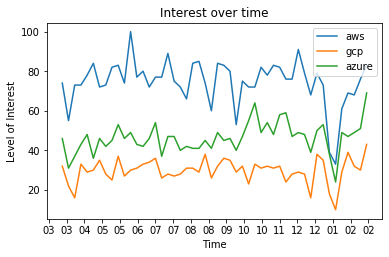

In [175]:
# x axis values: dates of the last n years (n defined above by the user)
numdays = 7
numweeks = 52
datelist = [begin_date]


#因為一年的資料只會算到50次 所以numweeks*numyears-3
for index in range (0, numweeks*numyears-3):
    datelist.append(datelist[index] + datetime.timedelta(days = numdays)) 
x_axis = datelist

#Plot into a chart 
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(0,20*numyears))
plt.gcf().autofmt_xdate()
plt.plot (x_axis, interest_over_time_df.iloc[:,0], label = 'aws')
plt.plot (x_axis, interest_over_time_df.iloc[:,1], label = 'gcp')
plt.plot (x_axis, interest_over_time_df.iloc[:,2], label = 'azure')
plt.xticks(rotation=1)
plt.xlabel('Time')
plt.ylabel('Level of Interest')
plt.title('Interest over time')
plt.legend()
plt.show()

In [184]:
# OR set specific date 
set_begin_date = datetime.datetime(2019, 1, 1)
set_end_date = datetime.datetime(2019, 12, 31)

print(set_begin_date.date() , set_end_date.date())
user_timeframe = set_begin_date.strftime('%Y-%m-%d')+' '+ set_end_date.strftime('%Y-%m-%d')

2019-01-01 2019-12-31


In [187]:
#Search 
pytrend.build_payload(kw_list=keywords, cat=0, timeframe=user_timeframe, geo='TW', gprop='')
pytrend.interest_over_time().head()

,aws,gcp,azure,isPartial
date,,,,
2019-01-06,80,25,39,False
2019-01-13,69,26,43,False
2019-01-20,72,16,44,False
2019-01-27,74,25,39,False
2019-02-03,16,9,11,False


In [ ]:
#Set lookback year from now on or set specific date at below block
numdays = 7
numweeks = 52
total_time_range = numdays * numweeks * numyears
end_date= date.today()
today_date = date.today()
end_date = today_date
begin_date = end_date - datetime.timedelta(days = total_time_range-7)
user_timeframe = begin_date.strftime('%Y-%m-%d')+' '+end_date.strftime('%Y-%m-%d')
print(user_timeframe)

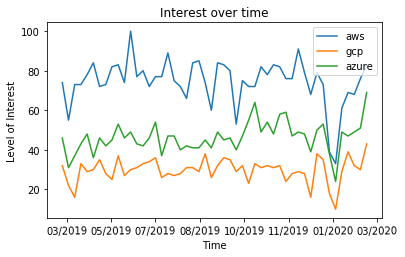

In [189]:
# x axis values: dates of the last n years (n defined above by the user)
numdays = 7
numweeks = 52
begin_date = end_date - datetime.timedelta(days = total_time_range-7)
datelist = [begin_date]


for index in range (0, numweeks*numyears-3):
    datelist.append(datelist[index] + datetime.timedelta(days = numdays)) 
x_axis = datelist

#Plot into a chart 
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(0,50*numyears))
plt.gcf().autofmt_xdate()
plt.plot (x_axis, interest_over_time_df.iloc[:,0], label = 'aws')
plt.plot (x_axis, interest_over_time_df.iloc[:,1], label = 'gcp')
plt.plot (x_axis, interest_over_time_df.iloc[:,2], label = 'azure')
plt.xticks(rotation=1)
plt.xlabel('Time')
plt.ylabel('Level of Interest')
plt.title('Interest over time')
plt.legend()
plt.show()

In [130]:
avg_search_result = interest_over_time_df.mean(0)
avg_search_result

aws      74.48
gcp      29.74
azure    46.30
dtype: float64

In [145]:
#AWS related queries
related_queries_dict = pytrend.related_queries()
aws_top_search = related_queries_dict['aws']['top']
aws_top_search 

,query,value
0,aws s3,100
1,aws ec2,86
2,aws lambda,57
3,aws cli,54
4,aws console,49
5,amazon,46
6,amazon aws,45
7,aws 台灣,37
8,aws 教學,37
9,aws rds,35


In [146]:
aws_rising_search = related_queries_dict['aws']['rising']
aws_rising_search

,query,value
0,aws educate,200
1,aws lambda,90
2,aws cli,80
3,台灣 人壽 aws,70
4,aws 台灣,40
5,aws s3,40


In [147]:
#GCP related queries
gcp_top_search = related_queries_dict['gcp']['top']
gcp_top_search

,query,value
0,google gcp,100
1,gcp console,86
2,gcp 教學,40
3,aws,35
4,gcp 課程,27


In [148]:
gcp_rising_search = related_queries_dict['gcp']['rising']
gcp_rising_search

,query,value
0,gcp 教學,130
1,gcp console,40


In [150]:
#Azure related queries
azure_top_search = related_queries_dict['azure']['top']
azure_top_search

,query,value
0,microsoft azure,100
1,microsoft,96
2,azure devops,61
3,azure portal,50
4,aws,42
5,azure ad,38
6,windows azure,29
7,azure 中文,19
8,微軟 azure,17
9,azure sphere,15


In [152]:
azure_rising_search = related_queries_dict['azure']['rising']
azure_rising_search

,query,value
0,azure devops,550
1,azure sphere,250
2,azure pass,70
